# Exploratory Data Analysis

This is a small exploratory notebook to take a first look at the data and the relations between the features

-----------


First import the needed libraries

In [1]:
import keras, ROOT, sklearn
import flat_helper
import numpy
import pandas as pd

# from keras_tqdm import TQDMNotebookCallback # uncomment this to get the progress bar
#import theano
#theano.config.gcc.cxxflags = '-march=corei7' 

## For plotting stuff
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # cosmetics
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA

Using TensorFlow backend.


Welcome to JupyROOT 6.12/06


Then load the data

In [2]:
dfQuarks = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/quarks_standard', 20000, recompute=False)
dfGluons = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/gluons_standard', 20000, recompute=False)

dfQuarks['isGluon'] = 0
dfGluons['isGluon'] = 1

labels = pd.concat([dfQuarks['isGluon'],dfGluons['isGluon']])
inputData = pd.concat([dfQuarks.drop('isGluon',axis=1), dfGluons.drop('isGluon',axis=1)])

Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_quarks_standard_shapes.root
Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_gluons_standard_shapes.root


## Exploration

Take a look at the information such as which branches, how many entries and the data type

In [3]:
print "Shape: ", dfQuarks.shape
dfQuarks.info()

#print "Shape: ", dfGluons.shape
#dfGluons.info()

Shape:  (20000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
mass          20000 non-null float32
ntowers       20000 non-null float32
radial        20000 non-null float32
dispersion    20000 non-null float32
ntracks       20000 non-null float32
isGluon       20000 non-null int64
dtypes: float32(5), int64(1)
memory usage: 546.9 KB


Look at the first "nevt" events for quarks and gluons, see some values of the features

In [4]:
nevt=6
dfQuarks.head(nevt)

,mass,ntowers,radial,dispersion,ntracks,isGluon
0,12.185929,11.0,0.045043,0.384206,1.401298e-44,0
1,5.329337,13.0,0.016920,0.436819,8.407791e-45,0
2,6.688938,3.0,0.026399,0.509502,1.121039e-44,0
3,8.983985,11.0,0.027306,0.405769,1.261169e-44,0
4,24.100706,12.0,0.111171,0.362364,1.541428e-44,0
5,6.914141,11.0,0.011104,0.563266,7.006492e-45,0


In [5]:
dfGluons.head(nevt)
# As an alternative, we can look at the last "nevt" events
#dfGluons.tail(nevt)
# Or randomly sample:
#dfGluons.sample(nevt)

,mass,ntowers,radial,dispersion,ntracks,isGluon
0,14.367233,14.0,0.054968,0.353077,2.382207e-44,1
1,10.668119,11.0,0.029878,0.555024,1.121039e-44,1
2,12.146415,13.0,0.034733,0.390114,2.242078e-44,1
3,8.801844,8.0,0.035857,0.556150,9.809089e-45,1
4,14.279649,9.0,0.049742,0.589295,1.681558e-44,1
5,17.277428,8.0,0.070760,0.371848,1.821688e-44,1


Now we will ask for a description of the datasets, this will give us some statistical information of each feature (mean, min, max, etc)

In [6]:
dfQuarks.describe()

,mass,ntowers,radial,dispersion,ntracks,isGluon
count,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.0
mean,10.143486,8.654600,0.037348,0.539091,1.121039e-44,0.0
std,4.229324,4.368953,0.024821,0.140604,0.000000e+00,0.0
min,1.163194,0.000000,0.000000,0.000000,0.000000e+00,0.0
25%,7.234231,5.000000,0.020514,0.437586,8.407791e-45,0.0
50%,9.240952,8.000000,0.030497,0.517837,1.121039e-44,0.0
75%,12.129803,11.000000,0.047002,0.618226,1.401298e-44,0.0
max,32.184860,35.000000,0.203564,1.000000,3.643376e-44,0.0


In [7]:
dfGluons.describe()

,mass,ntowers,radial,dispersion,ntracks,isGluon
count,20000.000000,20000.00000,20000.000000,20000.000000,2.000000e+04,20000.0
mean,13.587820,12.49070,0.054437,0.435623,1.541428e-44,1.0
std,4.567275,5.19121,0.028272,0.114319,0.000000e+00,0.0
min,2.256459,0.00000,0.000000,0.000000,0.000000e+00,1.0
25%,10.332701,9.00000,0.034168,0.356576,1.261169e-44,1.0
50%,12.955534,12.00000,0.049180,0.411027,1.541428e-44,1.0
75%,16.264200,16.00000,0.069413,0.486932,1.961818e-44,1.0
max,32.493828,41.00000,0.225824,1.000000,4.484155e-44,1.0


Test some assumptions on the data

In [8]:
dfQuarks.query('mass < 2.5')

,mass,ntowers,radial,dispersion,ntracks,isGluon
1268,2.064764,0.0,0.013451,0.672909,5.605194e-45,0
1813,2.402731,1.0,0.010976,0.599734,4.203895e-45,0
3035,1.171822,3.0,0.005085,0.710806,2.802597e-45,0
3153,1.948636,4.0,0.001758,1.000000,1.401298e-45,0
3535,2.411657,1.0,0.009278,1.000000,1.401298e-45,0
3976,2.497957,2.0,0.013278,0.543195,9.809089e-45,0
4316,2.408123,3.0,0.007058,1.000000,1.401298e-45,0
4851,2.034097,2.0,0.007983,0.707544,2.802597e-45,0
6276,2.267599,3.0,0.006351,0.837729,2.802597e-45,0
6717,2.480016,2.0,0.010717,0.624702,5.605194e-45,0


In [9]:
dfQuarks.query('radial == dispersion')


,mass,ntowers,radial,dispersion,ntracks,isGluon
2676,3.266142,7.0,0.0,0.0,0.0,0
5811,4.718185,8.0,0.0,0.0,0.0,0
7492,3.767240,6.0,0.0,0.0,0.0,0
10164,4.299165,10.0,0.0,0.0,0.0,0
11216,7.178011,5.0,0.0,0.0,0.0,0
13845,5.641160,12.0,0.0,0.0,0.0,0
13941,8.226786,9.0,0.0,0.0,0.0,0
15480,4.030625,9.0,0.0,0.0,0.0,0
15782,4.461095,6.0,0.0,0.0,0.0,0
17902,7.173931,7.0,0.0,0.0,0.0,0


### Visualization

Box plot of the stat information

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


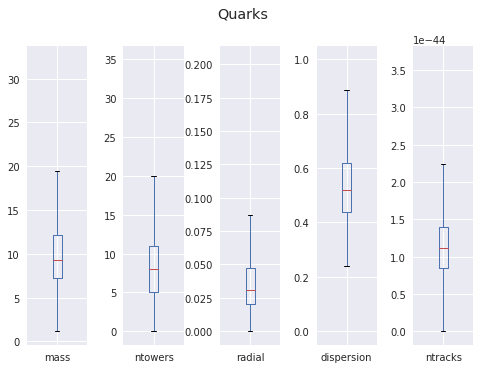

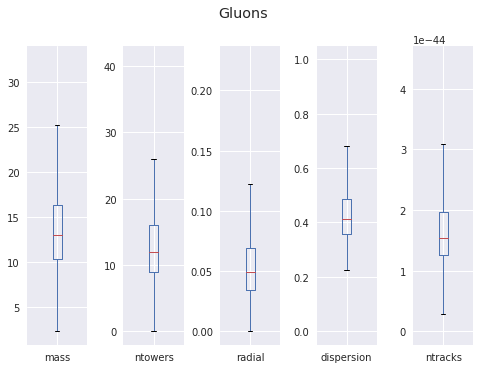

In [10]:
dfQuarks.drop('isGluon',axis=1).plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.6)
plt.suptitle("Quarks")
plt.show()
dfGluons.drop('isGluon',axis=1).plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.6)
plt.suptitle("Gluons")
plt.show()

Plot some 1D histograms

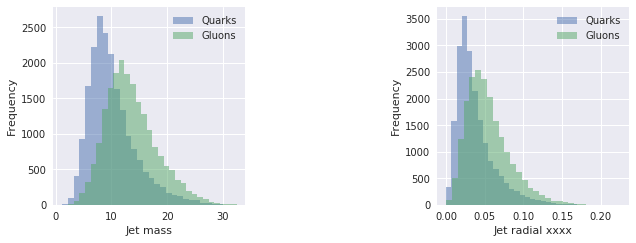

In [11]:
fig, ax = plt.subplots(1,2)

ax[0].hist(dfQuarks.mass, 30, alpha=0.5, label="Quarks")
ax[0].hist(dfGluons.mass, 30, alpha=0.5, label="Gluons")
ax[1].hist(dfQuarks.radial, 30, alpha=0.5, label="Quarks")
ax[1].hist(dfGluons.radial, 30, alpha=0.5, label="Gluons")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_xlabel("Jet mass")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Jet radial xxxx")
ax[1].set_ylabel("Frequency")

ax[0].legend()
ax[1].legend()

plt.show()

Or plot all at the same time

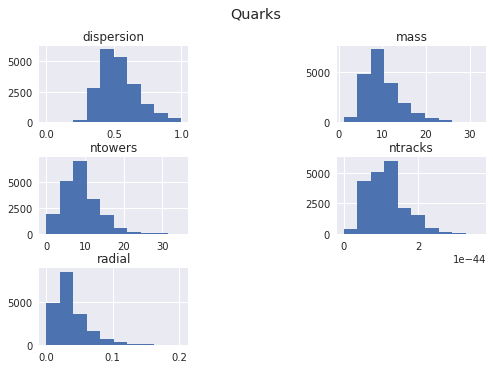

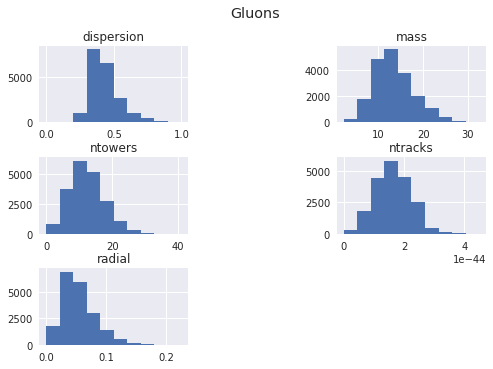

In [12]:
dfQuarks.drop('isGluon',axis=1).hist()
plt.subplots_adjust(hspace=0.45, wspace=1)
plt.suptitle("Quarks")
plt.show()
dfGluons.drop('isGluon',axis=1).hist()
plt.subplots_adjust(hspace=0.45, wspace=1)
plt.suptitle("Gluons")
plt.show()

Plot some 2D scatter plots

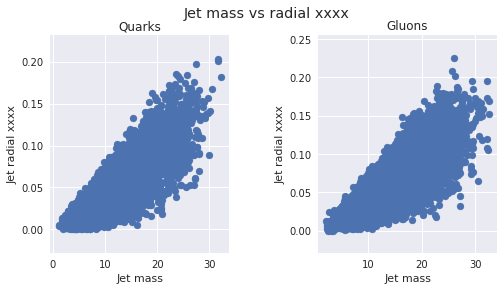

In [13]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].scatter(dfQuarks.mass, dfQuarks.radial)
ax[1].scatter(dfGluons.mass, dfGluons.radial)

ax[0].set_title("Quarks")
ax[1].set_title("Gluons")
ax[0].set_xlabel("Jet mass")
ax[1].set_xlabel("Jet mass")
ax[0].set_ylabel("Jet radial xxxx")
ax[1].set_ylabel("Jet radial xxxx")
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Jet mass vs radial xxxx")

plt.show()

Or plot all combinations simultaneously

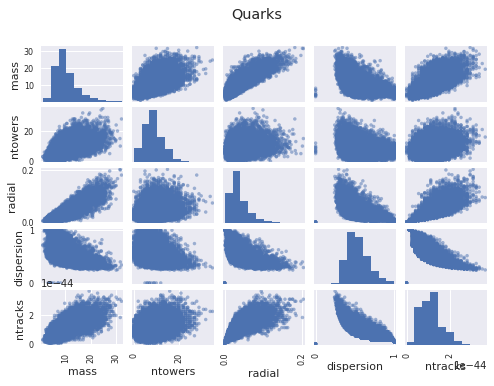

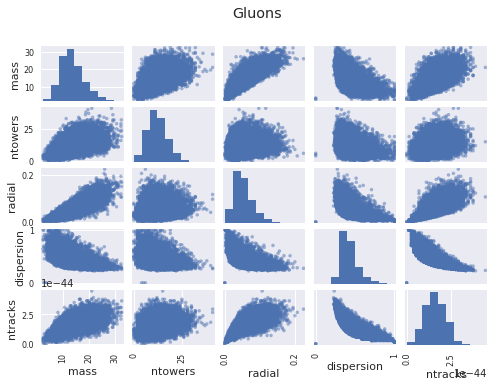

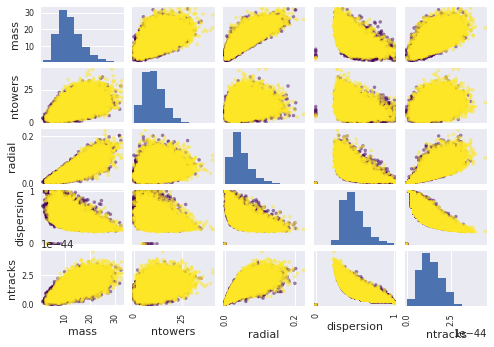

In [16]:
scatter_matrix(dfQuarks.drop('isGluon',axis=1))
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.suptitle("Quarks")
plt.show()
scatter_matrix(dfGluons.drop('isGluon',axis=1))
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.suptitle("Gluons")
plt.show()
scatter_matrix(inputData, c=labels, cmap='viridis')
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()

Remove outliers

In [17]:
dfQuarks = dfQuarks.drop(dfQuarks.query('dispersion == 0').index.get_values())
dfGluons = dfGluons.drop(dfGluons.query('dispersion == 0').index.get_values())

labels = pd.concat([dfQuarks['isGluon'],dfGluons['isGluon']])
inputData = pd.concat([dfQuarks.drop('isGluon',axis=1), dfGluons.drop('isGluon',axis=1)])

Get the correlation matrix

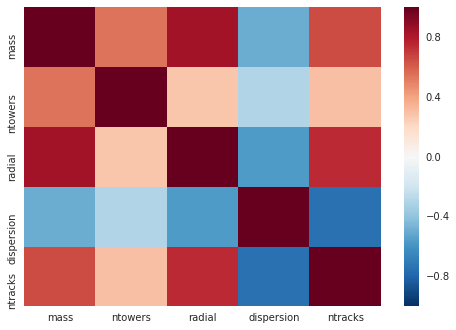

In [18]:
corrQuarks = dfQuarks.drop('isGluon',axis=1).corr()
sns.heatmap(corrQuarks,
            xticklabels=corrQuarks.columns.values,
            yticklabels=corrQuarks.columns.values)
sns.plt.show()

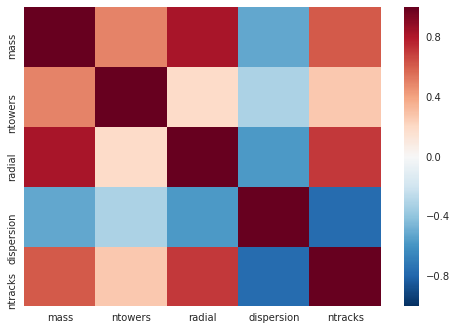

In [19]:
corrGluons = dfGluons.drop('isGluon',axis=1).corr()
sns.heatmap(corrGluons,
            xticklabels=corrGluons.columns.values,
            yticklabels=corrGluons.columns.values)
sns.plt.show()

#### Dimensionality Reduction

Start with PCA to only two dimensions

In [20]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(inputData)
print "Shape: ", reduced_data.shape

Shape:  (39987, 2)


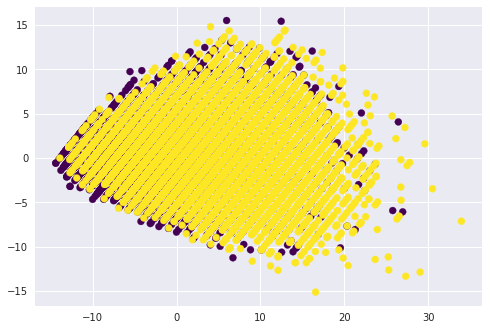

In [21]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap='viridis')

plt.show()

## Support Vector Machine

## Basic Neural Network

## Deep Belief Neural Network

## Ideas on decorrelating the input variables

In [ ]:
import scipy.linalg as la

print corrGluons
#print numpy.sqrt(corrGluons,dtype='complex128') # This is doing the square root of individual matrix elements
print la.cholesky(corrGluons)
print la.inv(la.cholesky(corrGluons))

dfGluonsDecorr = dfGluons.drop('isGluon',axis=1).dot(la.inv(la.cholesky(corrGluons).T))

dfGluonsDecorr.corr()


## Compare all ML Methods using ROC curves